# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Carga de datos

In [15]:
df = pd.read_csv('aguacates_EEUU.csv')
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Explorar el conjunto de datos  

In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Asegurar que estén los datos en orden cronológico

In [17]:
df = df.sort_values(by="Date")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

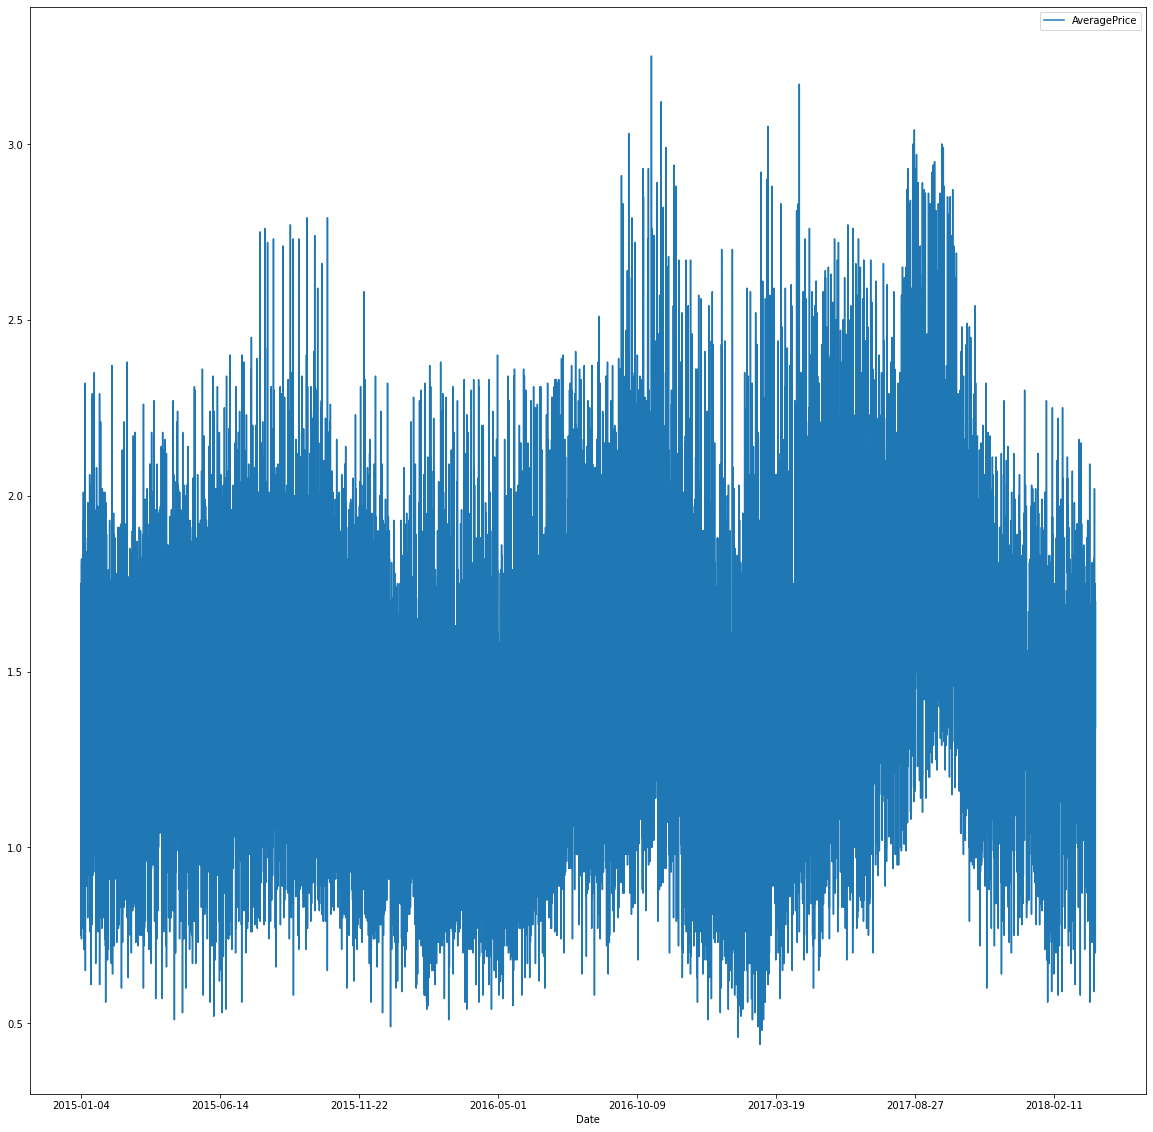

In [18]:
df.plot(x="Date", y=["AveragePrice"],
        kind="line", figsize=(20, 20))
plt.show()

# Realizar una gráfica de barras para ver el número de regiones

<AxesSubplot:>

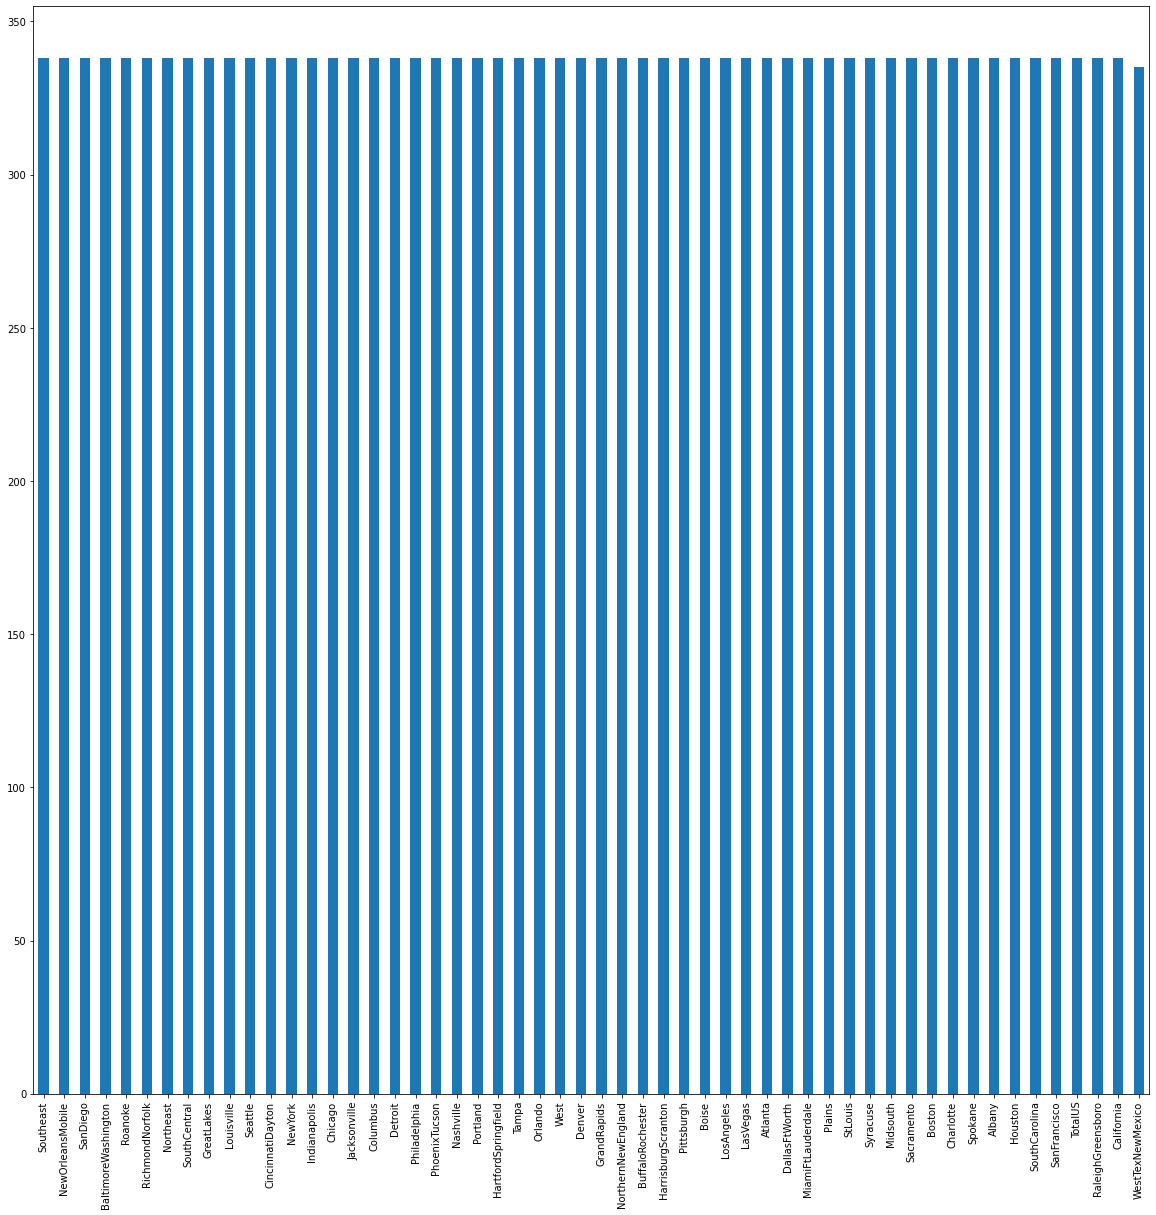

In [19]:
df['region'].value_counts().plot(kind='bar', figsize=(20, 20))

# Realizar una gráfica de barras para ver de qué años se tiene información

<AxesSubplot:>

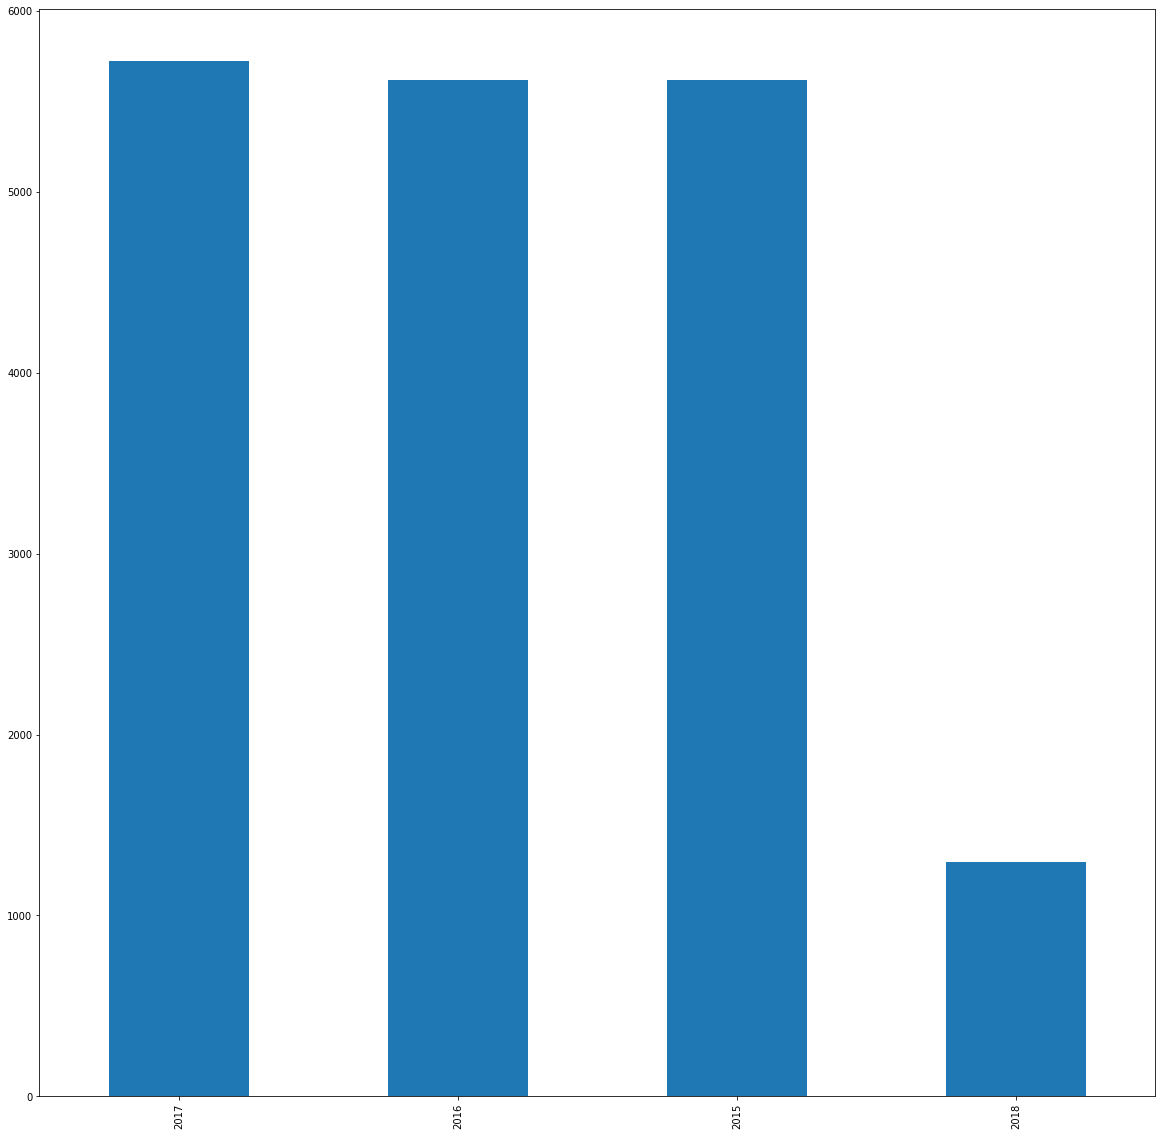

In [20]:
df['year'].value_counts().plot(kind='bar', figsize=(20, 20))

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [21]:
df['Date'] = pd.DatetimeIndex(df['Date'])

In [22]:
df = df.rename(columns={'Date': 'ds',
                        'AveragePrice': 'y'})

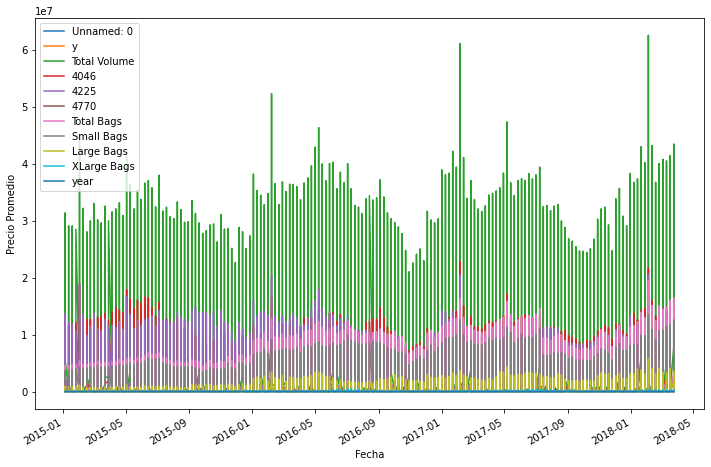

In [23]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Precio Promedio')
ax.set_xlabel('Fecha')

plt.show()

# Realizar predicciones

In [26]:
from prophet import Prophet
mi_modelo = Prophet(interval_width = 0.95)

# Creación y ajuste del modelo

In [27]:
mi_modelo.fit(df)

18:41:08 - cmdstanpy - INFO - Chain [1] start processing
18:41:13 - cmdstanpy - INFO - Chain [1] done processing


# Pronosticar hacia el futuro un año (365 días)

In [28]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=365, freq='D')
fechas_futuras.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [29]:
prediccion = mi_modelo.predict(fechas_futuras)

# Graficar los datos históricos y los del futuro

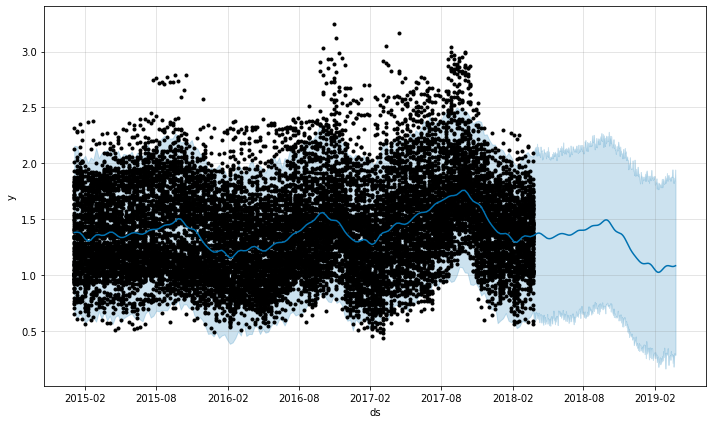

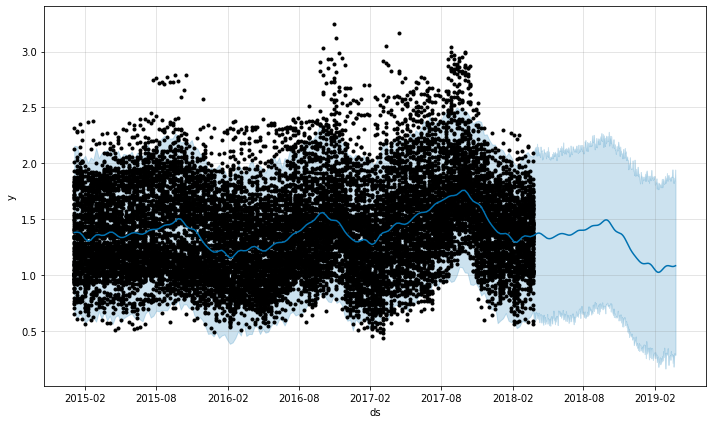

In [30]:
mi_modelo.plot(prediccion,
               uncertainty=True)

# Graficar los componentes del pronóstico

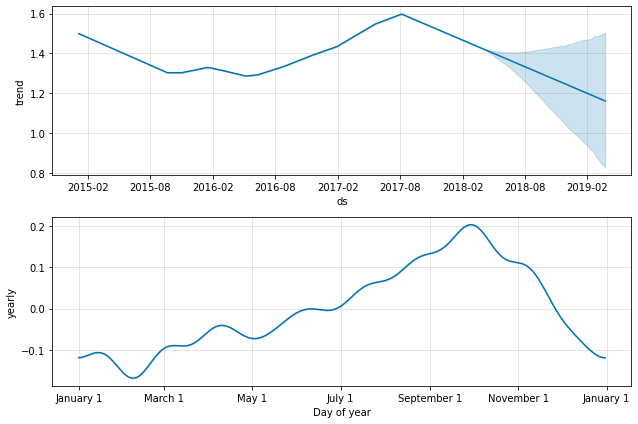

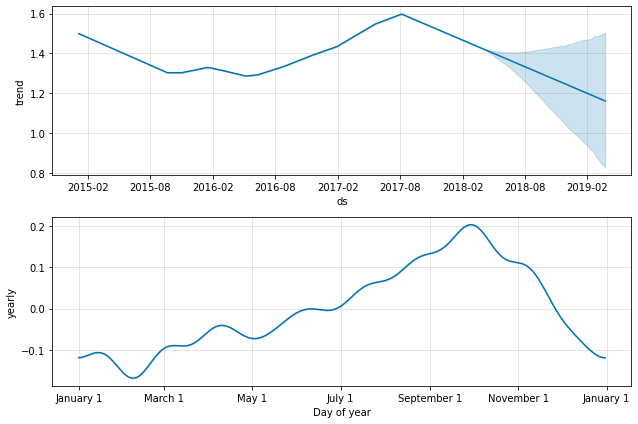

In [31]:
mi_modelo.plot_components(prediccion)

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [32]:
df = pd.read_csv('aguacates_EEUU.csv')
df.head(5)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [33]:
df.describe()

df = df.loc[df['region'] == 'West']

### Por si acaso no están ordenadas las observaciones

In [34]:
df = df.sort_values(by="Date")

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

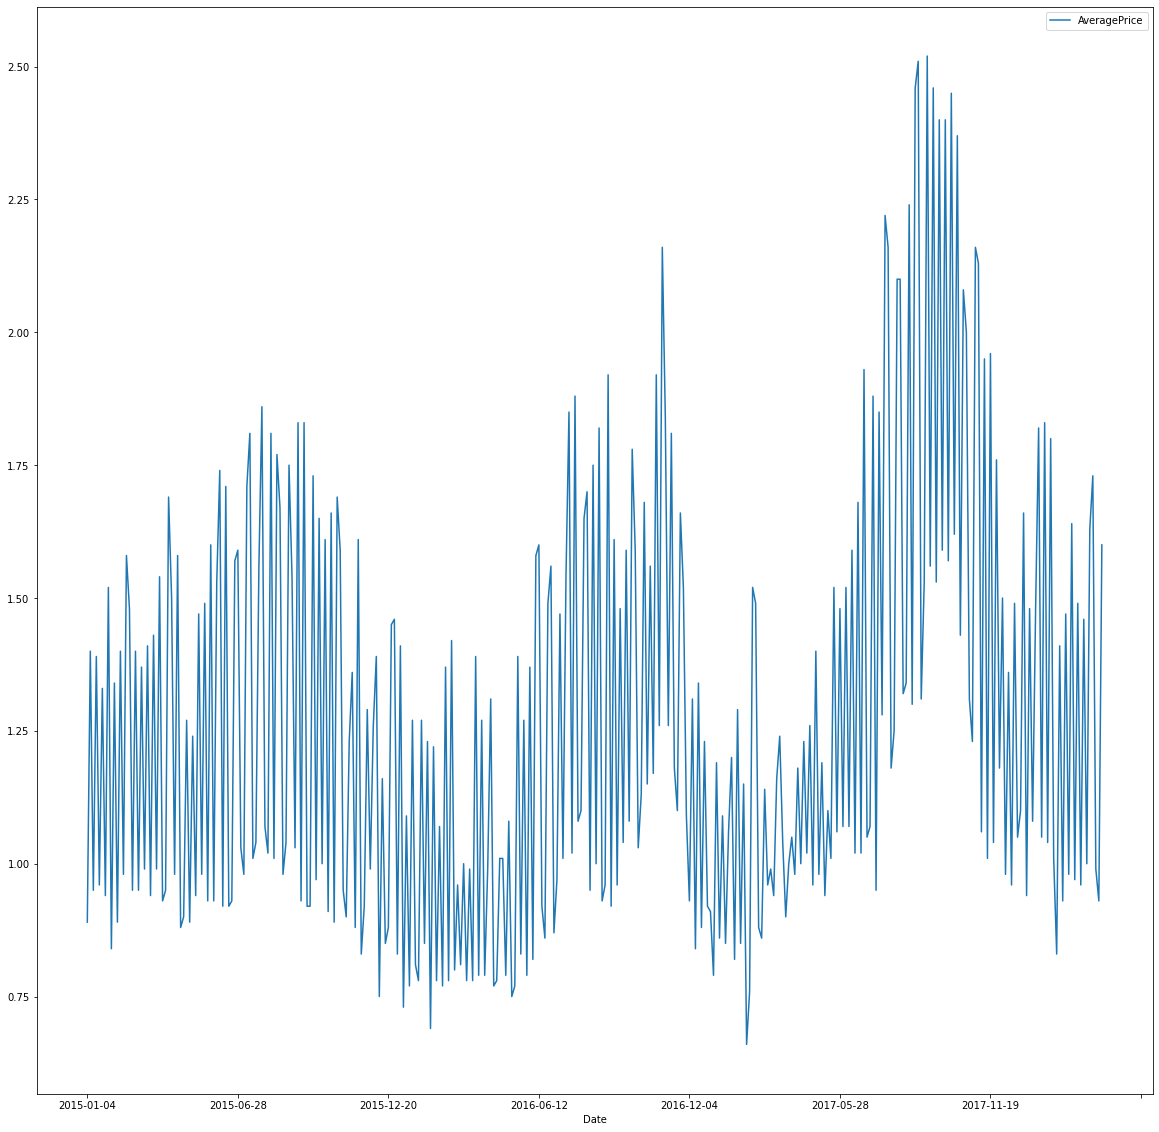

In [35]:
df.plot(x="Date", y=["AveragePrice"],
        kind="line", figsize=(20, 20))
plt.show()


# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

<AxesSubplot:>

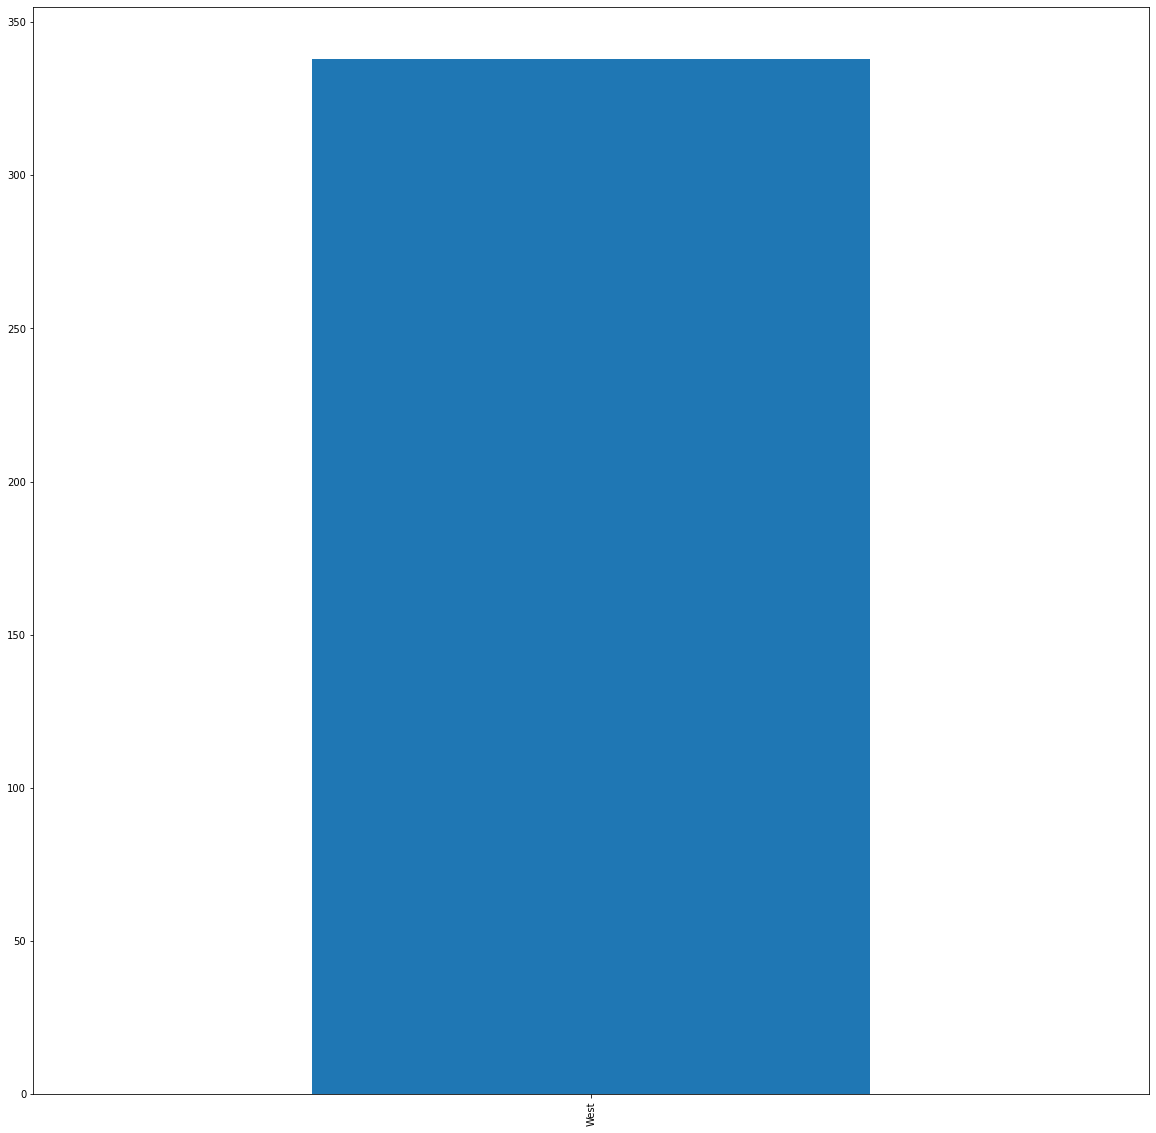

In [36]:
df['region'].value_counts().plot(kind='bar', figsize=(20, 20))

<AxesSubplot:>

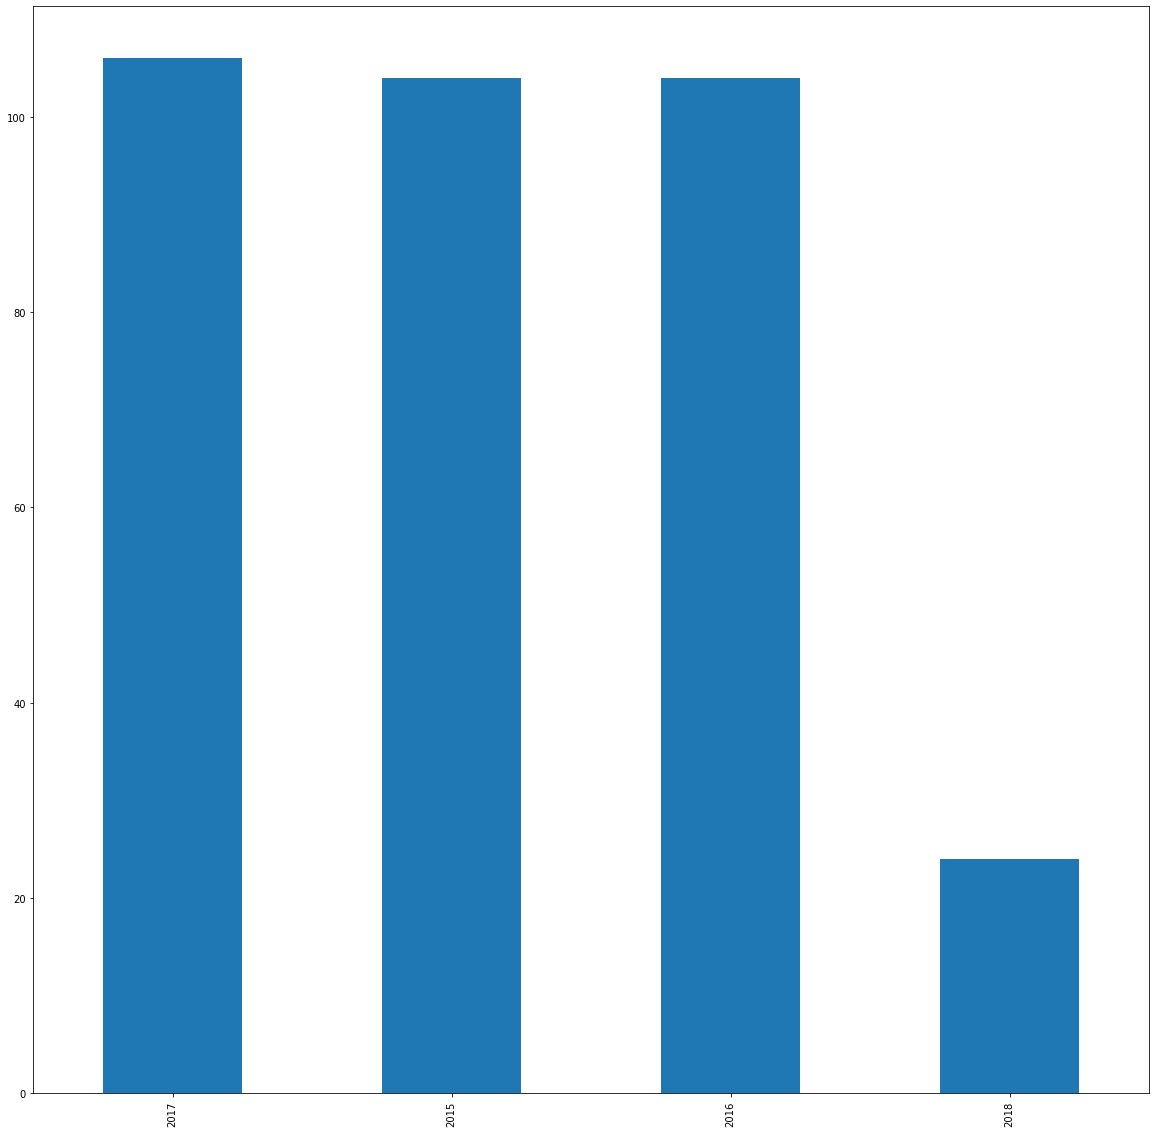

In [37]:
df['year'].value_counts().plot(kind='bar', figsize=(20, 20))

# Pronosticar al futuro un año (365 días)

In [38]:
df['Date'] = pd.DatetimeIndex(df['Date'])

# Graficar datos históricos y pronosticados

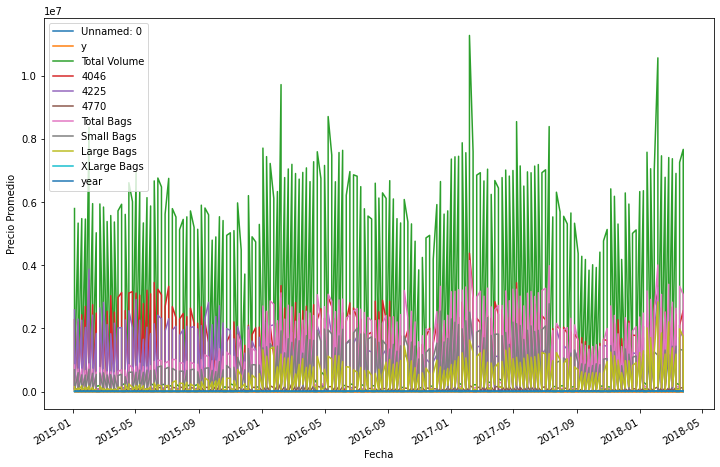

In [39]:
df = df.rename(columns={'Date': 'ds',
                        'AveragePrice': 'y'})

ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Precio Promedio')
ax.set_xlabel('Fecha')

plt.show()

In [40]:
from prophet import Prophet
mi_modelo = Prophet(interval_width = 0.95)

In [41]:
mi_modelo.fit(df)

18:52:21 - cmdstanpy - INFO - Chain [1] start processing
18:52:21 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=365, freq='D')
fechas_futuras.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [43]:
prediccion = mi_modelo.predict(fechas_futuras)

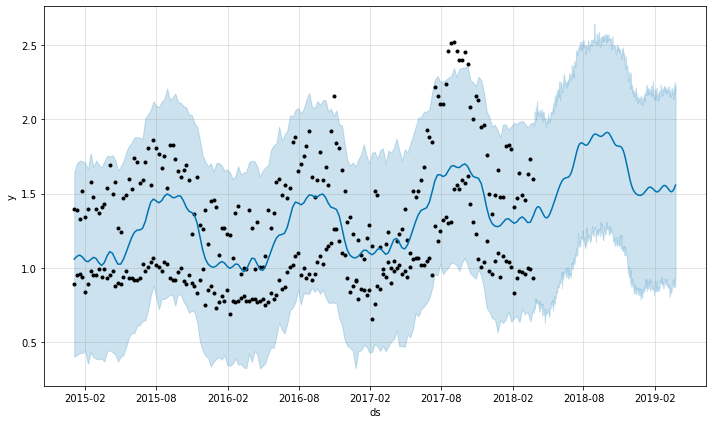

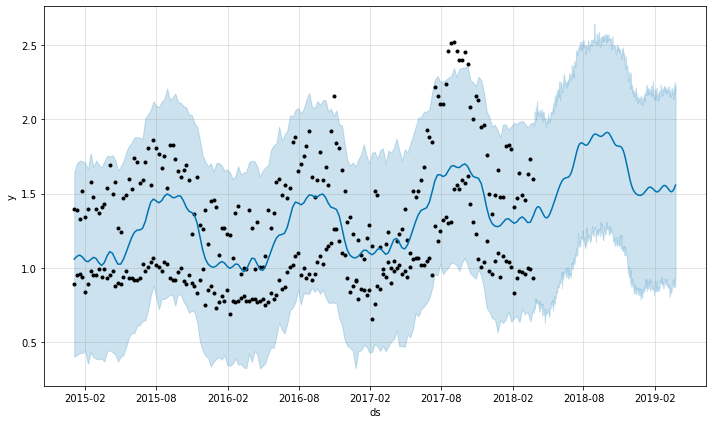

In [44]:
mi_modelo.plot(prediccion,
               uncertainty=True)

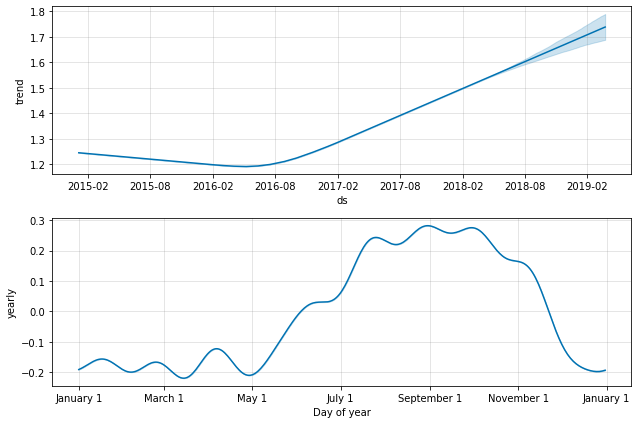

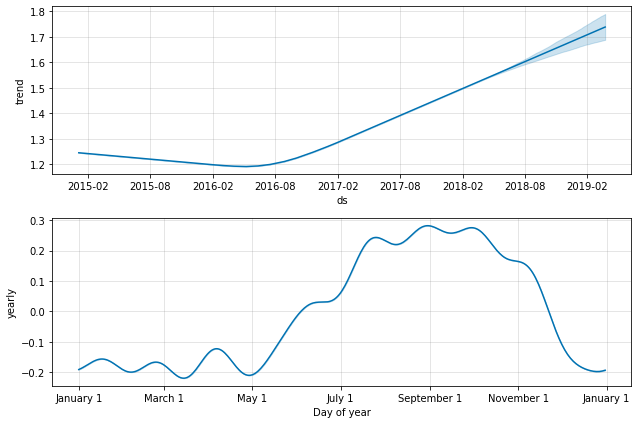

In [45]:
mi_modelo.plot_components(prediccion)